___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# DBSCAN - РЕШЕНИЯ для проверочных заданий

## Данные: Wholesale customers Data Set


Источник данных: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


Описание атрибутов:

    1) FRESH: расходы за год на свежие продукты (непрерывная переменная);
    2) MILK: расходы за год на молочные продукты (непрерывная переменная);
    3) GROCERY: расходы за год на продовольственные товары / бакалея (непрерывная переменная);
    4) FROZEN: расходы за год на замороженные продукты (непрерывная переменная)
    5) DETERGENTS_PAPER: расходы за год на моющие средства и бумажные изделия (непрерывная переменная)
    6) DELICATESSEN: расходы за год на деликатесы (непрерывная переменная);
    7) CHANNEL: канал клиента - индустрия общественного питания Horeca (отели/рестораны/кафе) или розничный канал Retail (Категориальная переменная)
    8) REGION: регион клиента - Lisnon, Oporto или Other (Категориальная переменная)
 

Исходные статьи:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN и примеры кластеризации данных

**Выполните задания, обозначенные жирным шрифтом:**

**Задание: запустите уже готовые ячейки для импорта библиотек и загрузки данных из файла в датафрейм.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Исследование данных (EDA - Exploratory Data Analysis)

**Задание: постройте график scatterplot, отображающий зависимость между переменными MILK и GROCERY, выполняя раскраску цветами по колонке Channel.**

In [5]:
# Напишите Ваш код в этой ячейке


<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

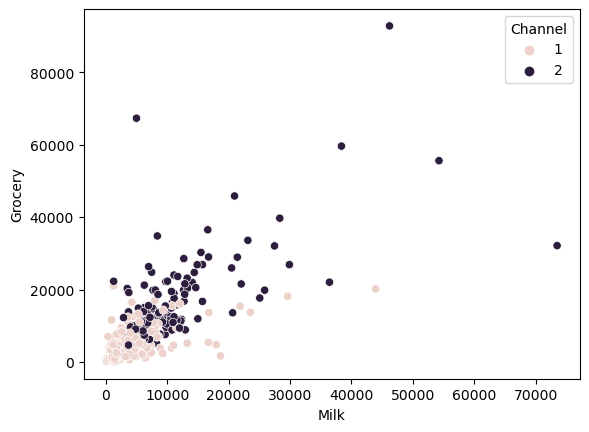

In [6]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')

**Задание: с помощью seaborn постройте гистограмму для колонки MILK, выполняя раскраску цветами по колонке Channel. Сможете ли Вы выяснить, как можно отобразить разные каналы один "над" другим ("stack"), вместо их наложения друг на друга, когда один канал находится "за" другим каналом?**

In [7]:
# Напишите Ваш код в этой ячейке


<AxesSubplot:xlabel='Milk', ylabel='Count'>

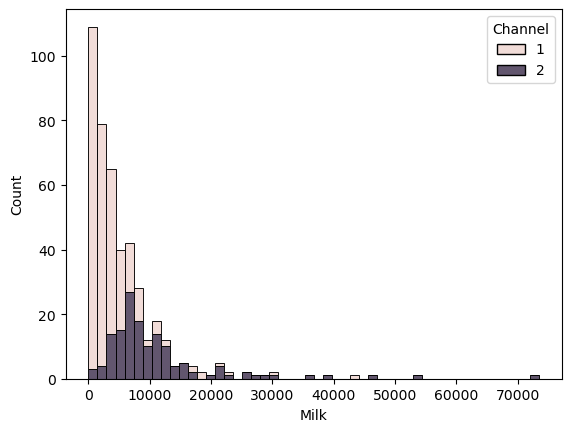

In [8]:
sns.histplot(df,x='Milk',hue='Channel',multiple="stack")

**Задание: постройте график clustermap для корреляций расходов по различным категориям (сами числа тоже нанесите на график).**

In [9]:
# Напишите Ваш код в этой ячейке


Correlation Between Spending Categories


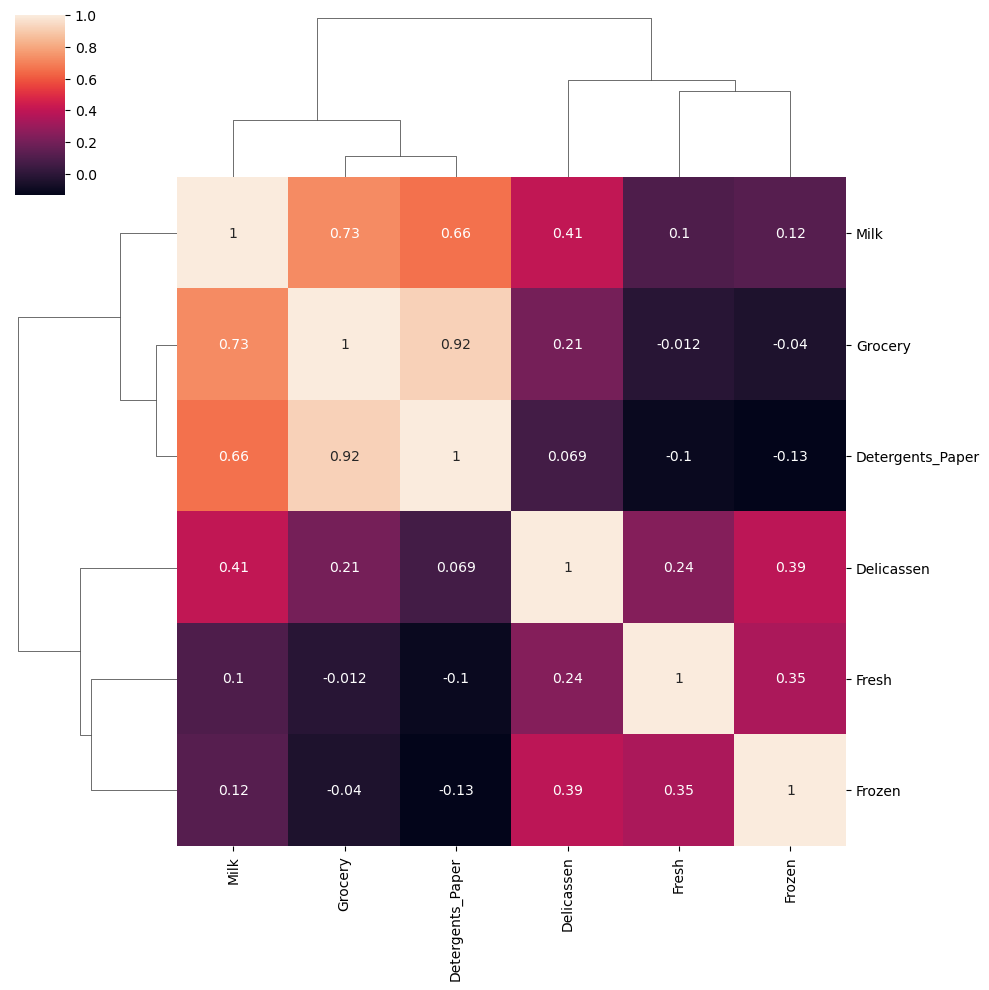

In [10]:
print('Correlation Between Spending Categories')
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(),annot=True);

**Задание: постройте график PairPlot для всех колонок датафрейма, раскрашивая разными цветами по колонке Region.**

In [11]:
# Напишите Ваш код в этой ячейке


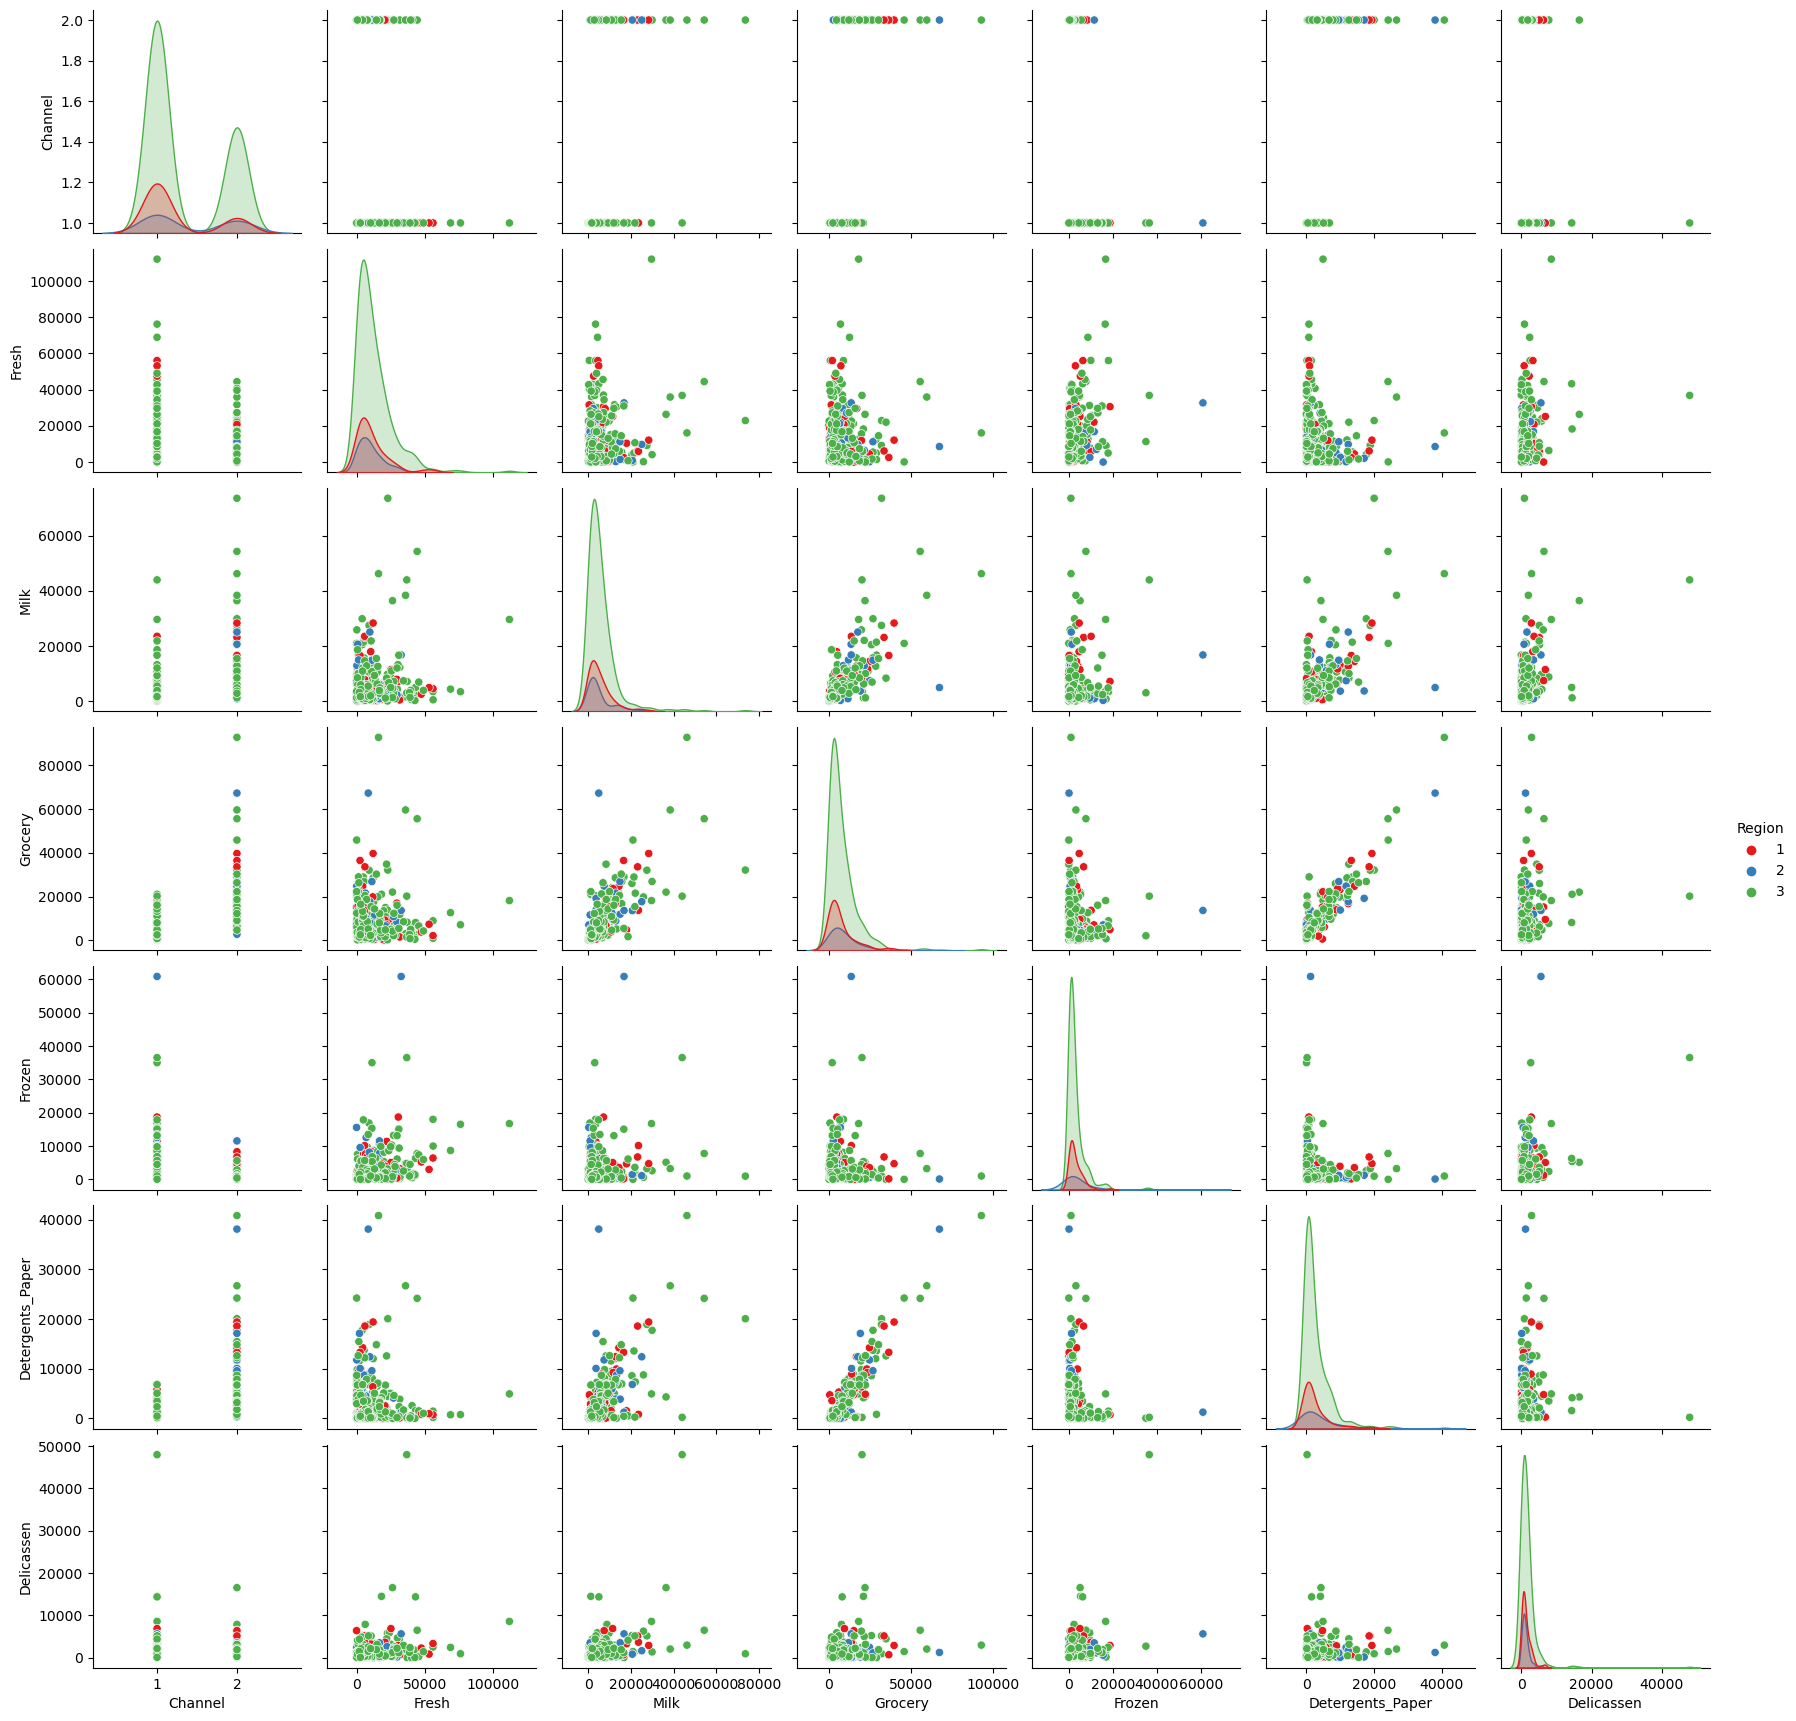

In [12]:
sns.pairplot(df,hue='Region',palette='Set1')

## DBSCAN

**Задание: поскольку значения разных признаков имеют разные масштабы единиц измерения, выполните масштабирование данных с помощью StandardScaler.**

In [13]:
# Напишите Ваш код в этой ячейке


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [15]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

**Задание: с помощью DBSCAN и цикла for создайте набор моделей для различных значений параметра эпсилон. В качестве параметра min_samples возьмите значение 2 умножить на количество признаков. Во время цикла сохраняйте процент точек-выбросов. В блокноте с решениями мы используем следующий диапазон значений эпсилон:**

    np.linspace(0.001,3,50)

In [16]:
# Напишите Ваш код в этой ячейке


In [17]:
from sklearn.cluster import DBSCAN

In [18]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

**Задание: постройте график lineplot для процента точек-выбросов в зависимости от значений эпсилон.**

In [19]:
# Напишите Ваш код в этой ячейке


Text(0.5, 0, 'Epsilon Value')

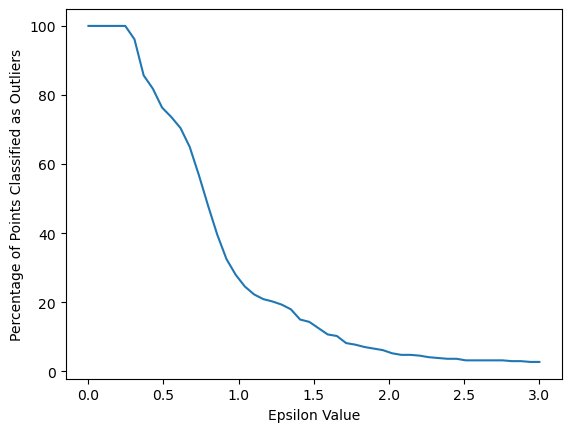

In [20]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

## DBSCAN для выбранного значения эпсилон

**Задание: на основе графике в предыдущем задании, создайте модель DBSCAN с выбранным Вами значением эпсилон. В наших решениях мы использовали eps=2.**

In [21]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

**Задание: постройте график scatterplot для колонок Milk и Grocery, раскрашивая данные разными цветами по результатам работы модели DBSCAN.**

In [22]:
# Напишите Ваш код в этой ячейке


<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

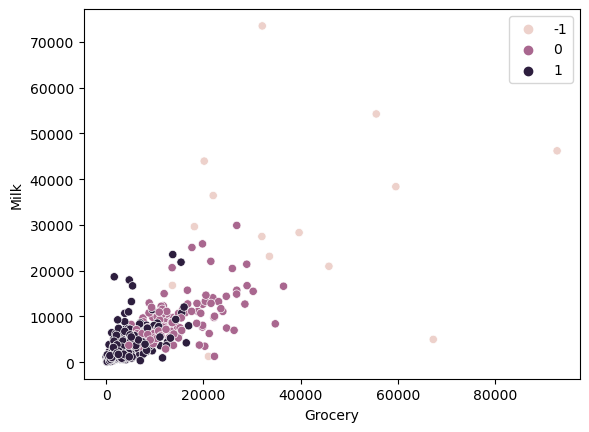

In [23]:
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_)

**Задание: постройте график scatterplot для колонок Milk и Detergents Paper, раскрашивая данные разными цветами по результатам работы модели DBSCAN.**

In [24]:
# Напишите Ваш код в этой ячейке


<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

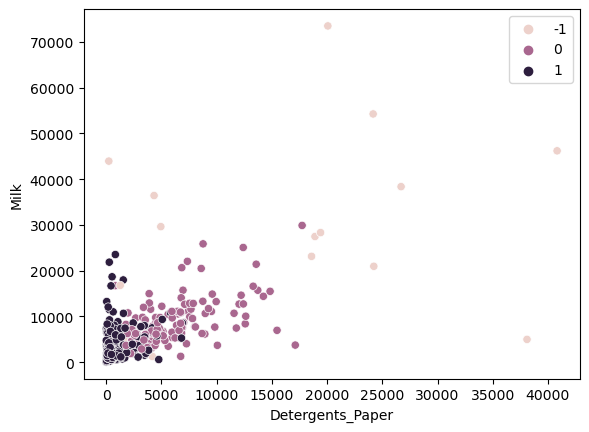

In [25]:
sns.scatterplot(data=df,x='Detergents_Paper',y='Milk',hue=dbscan.labels_)

**Задание: создайте новую колонку в исходном датафрейме, назовите эту колонку "Labels" и запишите в неё результаты работы модели DBSCAN - значения labels.**

In [26]:
# Напишите Ваш код в этой ячейке


In [27]:
df['Labels'] = dbscan.labels_

In [28]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


**Задание: вычислите средние значения расходов по различных категорий, причём отдельно для каждого из кластеров (включая кластер -1 для выбросов). Сравните расходы разных кластеров между собой (по отдельным категориям расходов).**

In [29]:
# Напишите Ваш код в этой ячейке


In [30]:
cats = df.drop(['Channel','Region'],axis=1)
cat_means = cats.groupby('Labels').mean()

In [31]:
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


**Задание: выполните нормализацию таблицы с данными, полученной в предыдущем задании, с помощью MinMaxScaler - чтобы значения менялись в диапазоне от 0 до 1. После этого постройте тепловую карту heatmap для получившихся значений.**

In [32]:
# Напишите Ваш код в этой ячейке


In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
data = scaler.fit_transform(cat_means)
scaled_means = pd.DataFrame(data,cat_means.index,cat_means.columns)

In [35]:
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<AxesSubplot:ylabel='Labels'>

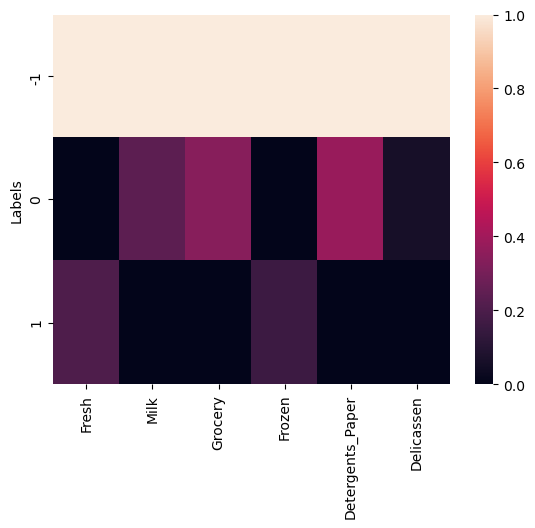

In [36]:
sns.heatmap(scaled_means)

**Задание: постройте ещё одну тепловую карту - такую же, как и в предыдущем задании, но на этот раз предварительно удалите выбросы из рассмотрения.**

In [37]:
# Напишите Ваш код в этой ячейке


<AxesSubplot:ylabel='Labels'>

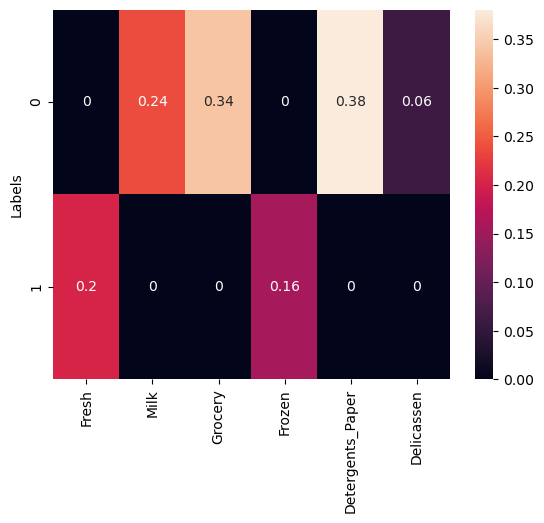

In [38]:
sns.heatmap(scaled_means.loc[[0,1]],annot=True)

**Задание: глядя на тепловую карту, по какой категории расходов эти два кластера различаются наиболее заметно?**

In [39]:
# Напишите Ваш ответ в этой ячейке

# Наиболее заметная разница значений в колонках "Detergents Paper" и "Grocery".